Topic Classification

In [2]:
!pip install simpletransformers

In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import matplotlib.pyplot as plt 
import seaborn as sn 

ModuleNotFoundError: No module named 'torch'

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving train_data1.csv to train_data1.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load["train_data1.csv"]))
df['topic'] = df['topic'].replace(['book', 'restaurant', 'movie'], [0, 1, 2])
df

,Unnamed: 0,text,topic
0,0,Stephen king originally wrote this book to add...,0
1,1,"Very satisfied after speaking with Manager, Pe...",1
2,2,"I have to say that ""The Subtle Knife"" is anoth...",0
3,3,"This satire is just really, really dead-on, an...",2
4,4,This book has a great story and concept but it...,0
...,...,...,...
2995,2995,This little review and outline packs a lot of ...,0
2996,2996,Now this place is one of my favorites! I recen...,1
2997,2997,Besides the comments on the technical merits o...,2
2998,2998,So this is the first restaurant I am reviewing...,1


In [ ]:
training = df[['text','topic']].copy()
training

,text,topic
0,Stephen king originally wrote this book to add...,0
1,"Very satisfied after speaking with Manager, Pe...",1
2,"I have to say that ""The Subtle Knife"" is anoth...",0
3,"This satire is just really, really dead-on, an...",2
4,This book has a great story and concept but it...,0
...,...,...
2995,This little review and outline packs a lot of ...,0
2996,Now this place is one of my favorites! I recen...,1
2997,Besides the comments on the technical merits o...,2
2998,So this is the first restaurant I am reviewing...,1


In [ ]:
from sklearn.model_selection import train_test_split

train, dev = train_test_split(training, test_size=0.1, random_state=0, 
                               stratify=training[['topic']])

In [ ]:
print(len(train))
print("train:", train[['topic']].value_counts(sort=False))
train.head(3)

2700
train: topic
0        900
1        900
2        900
dtype: int64


,text,topic
2004,This was my favorite of all of Jane Austen's n...,0
62,My favorite pad Thai w tofu and extra lime in ...,1
2698,I feel some what ashamed that it took me this ...,1


In [ ]:
print(len(dev))
print("dev:", dev[['topic']].value_counts(sort=False))
dev.head(3)

300
dev: topic
0        100
1        100
2        100
dtype: int64


,text,topic
2522,The plot intellect is about as light as feathe...,2
892,"Out of my 22 years of life, I have finally fou...",1
1682,"Once again, the Firstime Prophet Texe Marrs, S...",0


In [ ]:
# Model configuration # https://simpletransformers.ai/docs/usage/#configuring-a-simple-transformers-model 
model_args = ClassificationArgs()

model_args.overwrite_output_dir=True # overwrite existing saved models in the same directory
model_args.evaluate_during_training=True # to perform evaluation while training the model
# (eval data should be passed to the training method)

model_args.num_train_epochs=10 # number of epochs
model_args.train_batch_size=32 # batch size
model_args.learning_rate=4e-6 # learning rate
model_args.max_seq_length=256 # maximum sequence length
# Note! Increasing max_seq_len may provide better performance, but training time will increase. 
# For educational purposes, we set max_seq_len to 256.

# Early stopping to combat overfitting: https://simpletransformers.ai/docs/tips-and-tricks/#using-early-stopping
model_args.use_early_stopping=True
model_args.early_stopping_delta=0.01 # "The improvement over best_eval_loss necessary to count as a better checkpoint"
model_args.early_stopping_metric='eval_loss'
model_args.early_stopping_metric_minimize=True
model_args.early_stopping_patience=2
model_args.evaluate_during_training_steps=32 # how often you want to run validation in terms of training steps (or batches)

In [ ]:
steps_per_epoch = int(np.ceil(len(train) / float(model_args.train_batch_size)))
print('Each epoch will have {:,} steps.'.format(steps_per_epoch)) # 64 steps = validating 2 times per epoch

Each epoch will have 85 steps.


In [ ]:
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args=model_args, use_cuda=True) # CUDA is enabled

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
print(str(model.args).replace(',', '\n')) # model args

ClassificationArgs(adafactor_beta1=None
 adafactor_clip_threshold=1.0
 adafactor_decay_rate=-0.8
 adafactor_eps=(1e-30
 0.001)
 adafactor_relative_step=True
 adafactor_scale_parameter=True
 adafactor_warmup_init=True
 adam_betas=(0.9
 0.999)
 adam_epsilon=1e-08
 best_model_dir='outputs/best_model'
 cache_dir='cache_dir/'
 config={}
 cosine_schedule_num_cycles=0.5
 custom_layer_parameters=[]
 custom_parameter_groups=[]
 dataloader_num_workers=0
 do_lower_case=False
 dynamic_quantize=False
 early_stopping_consider_epochs=False
 early_stopping_delta=0.01
 early_stopping_metric='eval_loss'
 early_stopping_metric_minimize=True
 early_stopping_patience=2
 encoding=None
 eval_batch_size=8
 evaluate_during_training=True
 evaluate_during_training_silent=True
 evaluate_during_training_steps=32
 evaluate_during_training_verbose=False
 evaluate_each_epoch=True
 fp16=True
 gradient_accumulation_steps=1
 learning_rate=4e-06
 local_rank=-1
 logging_steps=50
 loss_type=None
 loss_args={}
 manual_seed=

In [ ]:
_, history = model.train_model(train, eval_df=dev)

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:612: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/2700 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/85 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/85 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/85 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/85 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/85 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

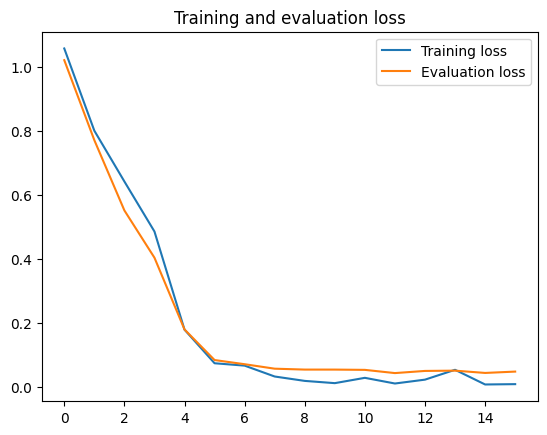

In [ ]:
# Training and evaluation loss
train_loss = history['train_loss']
eval_loss = history['eval_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss')
plt.legend()

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(dev)
result

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/38 [00:00<?, ?it/s]

{'mcc': 0.9850492536940578, 'eval_loss': 0.04869326164847926}

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving sentiment-topic-final-test.tsv to sentiment-topic-final-test.tsv


In [ ]:
test = pd.read_csv(io.BytesIO(data_to_load["sentiment-topic-final-test.tsv"]),delimiter = '\t')
test['topic'] = test['topic'].replace(['book', 'restaurant', 'movie'], [0, 1, 2])
test = test[['text','topic']].copy()
test

,text,topic
0,It took eight years for Warner Brothers to rec...,2
1,All the New York University students love this...,1
2,This Italian place is really trendy but they h...,1
3,"In conclusion, my review of this book would be...",0
4,The story of this movie is focused on Carl Bra...,2
5,Chris O'Donnell stated that while filming for ...,2
6,My husband and I moved to Amsterdam 6 years ag...,1
7,Dame Maggie Smith performed her role excellent...,2
8,The new movie by Mr. Kruno was shot in New Yor...,2
9,"I always have loved English novels, but I just...",0


In [ ]:
predicted, probabilities = model.predict(test.text.to_list())
test['predicted'] = predicted

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
test

,text,topic,predicted
0,It took eight years for Warner Brothers to rec...,2,2
1,All the New York University students love this...,1,1
2,This Italian place is really trendy but they h...,1,1
3,"In conclusion, my review of this book would be...",0,0
4,The story of this movie is focused on Carl Bra...,2,2
5,Chris O'Donnell stated that while filming for ...,2,2
6,My husband and I moved to Amsterdam 6 years ag...,1,1
7,Dame Maggie Smith performed her role excellent...,2,2
8,The new movie by Mr. Kruno was shot in New Yor...,2,2
9,"I always have loved English novels, but I just...",0,0


In [ ]:
import pathlib
import sklearn
import numpy
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from collections import Counter
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
final_vec = CountVectorizer(min_df=2, 
                             tokenizer=nltk.word_tokenize, 
                             stop_words=stopwords.words('english'))

In [ ]:
cutoff = len(training.text)

review_counts = final_vec.fit_transform(training.text.tolist()+test.text.tolist())

review_trains_counts = review_counts[:cutoff]
review_test_counts = review_counts[cutoff:]

print(review_trains_counts.shape)
print(review_test_counts.shape)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


(3000, 13305)
(10, 13305)


In [ ]:
tfidf_transformer = TfidfTransformer()
review_trains_tfidf = tfidf_transformer.fit_transform(review_trains_counts)
review_trains_tfidf.shape

(3000, 13305)

In [ ]:
review_test_tfidf = tfidf_transformer.fit_transform(review_test_counts)
review_test_tfidf.shape

(10, 13305)

In [ ]:
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(review_trains_tfidf, training.topic)
predict = lin_clf.predict(review_test_tfidf)

SVM

In [ ]:
print(classification_report(test.topic, predict))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         5

    accuracy                           0.90        10
   macro avg       0.89      0.89      0.87        10
weighted avg       0.93      0.90      0.90        10



In [ ]:
j = 0
for i in test.topic:
    if i == predict[j]:
        print("correct")
    else:
        print("predict: %s, was: %s" %(predict[j],i))
    j+=1

correct
predict: 0, was: 1
correct
correct
correct
correct
correct
correct
correct
correct


BERT

In [ ]:
print(classification_report(test['topic'], test['predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

